In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import json
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *Reading business data*

In [ ]:
bus_2018 = pd.read_json("2018_yelp_business.json",lines=True)
bus_2020 = pd.read_json("2020_yelp_business.json",lines=True)

In [ ]:
bus_2018.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [ ]:
bus_2020.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [ ]:
bus_2018.shape

(192609, 14)

In [ ]:
bus_2020.shape

(209393, 14)

In [ ]:
bus_2018['is_open'].value_counts()

1    158525
0     34084
Name: is_open, dtype: int64

In [ ]:
bus_2020['is_open'].value_counts()

1    168903
0     40490
Name: is_open, dtype: int64

In [ ]:
#select all restaurants in bus_2018
flag_restaurants = bus_2018['categories'].str.contains('Restaurants')
df_res_2018 = bus_2018.loc[flag_restaurants==True]
df_res_2018.shape

(59371, 14)

In [ ]:
#select all restaurants in bus_2020
flag_restaurants = bus_2020['categories'].str.contains('Restaurants')
df_res_2020 = bus_2020.loc[flag_restaurants==True]
df_res_2020.shape

(63944, 14)

Text(0.5, 1.0, 'Open Status by State in 2018')

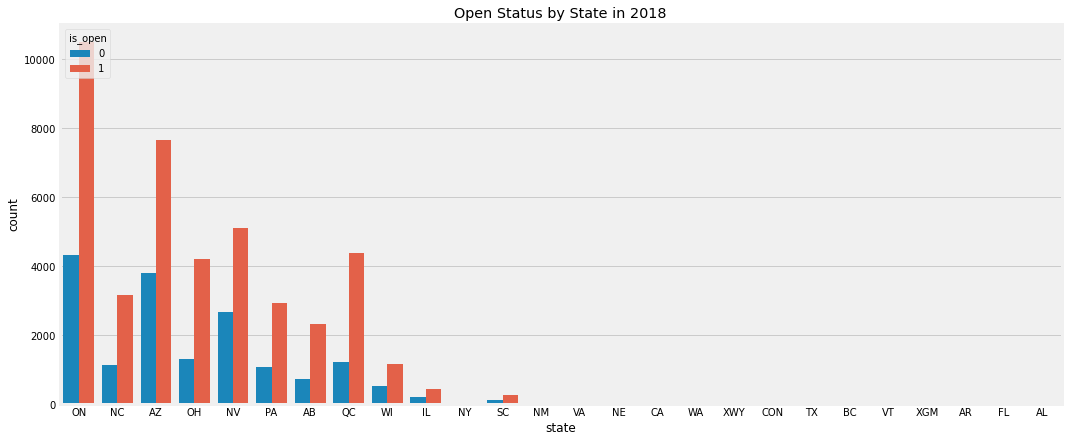

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(data=df_res_2018, x='state', hue='is_open')
plt.title('Open Status by State in 2018')

Text(0.5, 1.0, 'Open Status by State in 2020')

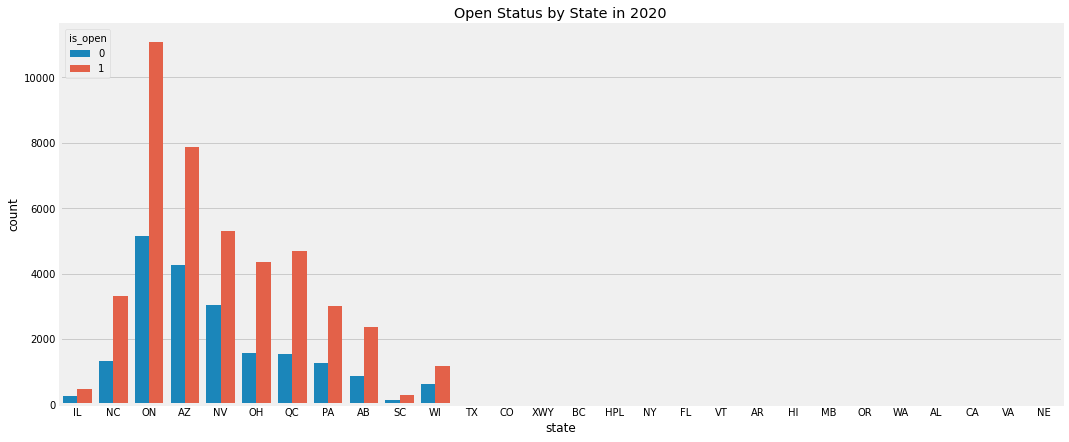

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(data=df_res_2020, x='state', hue='is_open')
plt.title('Open Status by State in 2020')

Filter out states outside the US

In [ ]:
df_res_2018['state'].value_counts()

ON     14831
AZ     11465
NV      7783
QC      5622
OH      5522
NC      4326
PA      4001
AB      3035
WI      1703
IL       672
SC       384
NY        12
XWY        2
FL         1
TX         1
AR         1
XGM        1
VT         1
BC         1
VA         1
CON        1
WA         1
CA         1
NE         1
NM         1
AL         1
Name: state, dtype: int64

In [ ]:
lst_select_state = ['AZ','NV','OH','NC','PA','WI','IL','SC']

In [ ]:
df_res_2018_us = df_res_2018[df_res_2018['state'].isin(lst_select_state)]
df_res_2018_us.shape

(35856, 14)

In [ ]:
df_res_2020['state'].value_counts()

ON     16221
AZ     12124
NV      8340
QC      6228
OH      5914
NC      4655
PA      4259
AB      3245
WI      1794
IL       702
SC       427
NY        12
TX         4
CA         3
BC         2
CO         2
HPL        1
XWY        1
FL         1
VT         1
AR         1
HI         1
MB         1
OR         1
WA         1
AL         1
VA         1
NE         1
Name: state, dtype: int64

# *Merge 2018 and 2020 dataset to find match restaurants*

In [ ]:
df_res = df_res_2018.merge(df_res_2020, on='business_id')
df_res.shape

(58585, 27)

In [ ]:
df_res.head()

,business_id,name_x,address_x,city_x,state_x,postal_code_x,latitude_x,longitude_x,stars_x,review_count_x,...,state_y,postal_code_y,latitude_y,longitude_y,stars_y,review_count_y,is_open_y,attributes_y,categories_y,hours_y
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,...,ON,L5R 3E7,43.605499,-79.652289,2.5,145,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Chinese, Specialty Food, Dim Sum, Imported Foo...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,...,NC,28210,35.092564,-80.859132,4.0,196,1,"{'NoiseLevel': 'u'average'', 'Caters': 'False'...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,...,AZ,85016,33.495194,-112.028588,2.5,25,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Restaurants, Breakfast & Brunch, Fast Food, Me...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,...,OH,44060,41.708520,-81.359556,4.0,15,1,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Italian, Chicken Wings, Restaurants, Pizza","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
4,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,...,NV,89119,36.100016,-115.128529,4.0,41,0,"{'OutdoorSeating': 'False', 'BusinessParking':...","Italian, Restaurants",None


In [ ]:
df_res_us = df_res_2018_us.merge(df_res_2020, on='business_id')
df_res_us.shape

(35421, 27)

In [ ]:
df_res_us['is_open_x'].value_counts()

1    24736
0    10685
Name: is_open_x, dtype: int64

In [ ]:
df_res_us['is_open_y'].value_counts()

1    23151
0    12270
Name: is_open_y, dtype: int64

In [ ]:
# open status of 2018
df_res['is_open_x'].value_counts()

1    41718
0    16867
Name: is_open_x, dtype: int64

In [ ]:
# open status of 2020
df_res['is_open_y'].value_counts()

1    38866
0    19719
Name: is_open_y, dtype: int64

In [ ]:
#check restaurants open in 2018 but closed in 2020
df_res[(df_res['is_open_x']==1) & (df_res['is_open_y']==0)].shape

(2932, 27)

In [ ]:
df_res[(df_res['is_open_x']==1) & (df_res['is_open_y']==1)].shape

(38786, 27)

In [ ]:
df_res[(df_res['is_open_x']==0) & (df_res['is_open_y']==1)].shape

(80, 27)

In [ ]:
df_res[(df_res['is_open_x']==0) & (df_res['is_open_y']==0)].shape

(16787, 27)

# *Save matched restaurant id*

In [ ]:
matched_resid = df_res[['business_id']]
matched_resid.shape

(58585, 1)

In [ ]:
matched_resid.to_csv('matched restaurant id.csv', index=False)

In [ ]:
bus_2018 = matched_resid.merge(df_res_2018, on='business_id')
bus_2018.to_csv('2018_yelp_business_matched.csv', index=False)

In [ ]:
bus_2020 = matched_resid.merge(df_res_2020, on='business_id')
bus_2020.to_csv('2020_yelp_business_matched.csv', index=False)

# *Extract customer review with matched restaurant id*

In [ ]:
# define functions to extract review data
def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file,'rb') as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

In [ ]:
%%time
# extract customer review in 2018
yelp_review_2018= read_json('2018_yelp_review.json')

Wall time: 1min 15s


In [ ]:
display(yelp_review_2018.shape)
yelp_review_2018.head()

(6685900, 9)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [ ]:
%%time
# extract review for matched restaurant id in 2018
review_2018 = matched_resid.merge(yelp_review_2018, on='business_id')

Wall time: 8.06 s


In [ ]:
display(review_2018.shape)
review_2018.head()

(4187317, 9)

,business_id,review_id,user_id,stars,useful,funny,cool,text,date
0,QXAEGFB4oINsVuTFxEYKFQ,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,3,2,0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,QXAEGFB4oINsVuTFxEYKFQ,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3.0,0,0,0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30
2,QXAEGFB4oINsVuTFxEYKFQ,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3.0,0,0,0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
3,QXAEGFB4oINsVuTFxEYKFQ,2pf45Stf-pNew-xgTababQ,lymyUak6KNcNKoDbK87MiQ,1.0,1,0,0,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43
4,QXAEGFB4oINsVuTFxEYKFQ,RHhlmL07evgAdPaXQV8Omg,6vU0I5XgCv9OQHZ76rV6qw,4.0,2,1,2,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55


In [ ]:
%%time
review_2018.to_csv('2018_yelp_review_matched.csv', index=False)

Wall time: 56.4 s


In [ ]:
%%time
# extract customer review in 2020
yelp_review_2020= read_json('2020_yelp_review.json')

Wall time: 1min 22s


In [ ]:
display(yelp_review_2020.shape)
yelp_review_2020.head()

(8021122, 9)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [ ]:
%%time
# extract review for matched restaurant id in 2020
review_2020 = matched_resid.merge(yelp_review_2020, on='business_id')

Wall time: 14 s


In [ ]:
display(review_2020.shape)
review_2020.head()

(4926506, 9)

,business_id,review_id,user_id,stars,useful,funny,cool,text,date
0,QXAEGFB4oINsVuTFxEYKFQ,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,3,2,0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,QXAEGFB4oINsVuTFxEYKFQ,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3.0,0,0,0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
2,QXAEGFB4oINsVuTFxEYKFQ,_Hr9z8pJ5nZSf7FS1O8ujw,R-xGsTpwlwuOe_vAbg_aeA,2.0,2,0,1,"Despite the poor service here, my family comes...",2015-02-24 04:32:58
3,QXAEGFB4oINsVuTFxEYKFQ,4Sg_ziTcrYlGO0dVyj2V3g,agqWketq-FhYwVmRyli4jA,1.0,2,0,0,I went at 230 on a Monday. It was dimsum \n\nI...,2017-01-02 20:32:29
4,QXAEGFB4oINsVuTFxEYKFQ,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3.0,0,0,0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30


In [ ]:
review_2020.to_csv('2020_yelp_review_matched.csv', index=False)